In [1]:
import pandas as pd
import numpy as np

In [2]:
import plotly.io as pio

In [3]:
from bertopic import BERTopic
from cuml.cluster import HDBSCAN
from cuml.manifold import UMAP

In [4]:
topic_model = BERTopic.load("./data/topic_model_final")

In [5]:
topic_model.get_topic_info()

Topic   Count                                      Name  \
0      -1  528267                         -1_bpjs_di_yg_dan   
1       0   76542                   0_terima_kasih_salam_dm   
2       1   18397                    1_saya_kelas_naik_bpjs   
3       2   16594                       2_bpjs_gigi_pake_ga   
4       3    6420                      3_gue_punya_maju_aku   
5       4    5320                          4_bpjs_yo_ra_nek   
6       5    5297        5_kesehatan_bpjs_pelayanan_layanan   
7       6    4987                     6_kartu_ktp_pulsa_sim   
8       7    3969                        7_hp_jkn_no_mobile   
9       8    3784             8_corona_virus_kesehatan_bpjs   
10      9    3667  9_ketenagakerjaan_bpjs_kesehatan_surplus   
11     10    3211                 10_mulyani_sri_audit_bpkp   
12     11    2830             11_jokowi_presiden_iuran_bpjs   
13     12    2633        12_korupsi_asabri_jiwasraya_bansos   
14     13    2603    13_gaji_ketenagakerjaan_kerja_lowongan   
15     14    2558             14_psikolog_psikiater_ke_pake   
16     15    2414         15_data_kebocoran_bocor_kesehatan   
17     16    2281       16_bsu_blt_ketenagakerjaan_penerima   

                  CustomName  
0      outlier: bpjs, di, yg  
1            support_twitter  
2                 iuran_bpjs  
3   penggunaan_coverage_bpjs  
4           maju_gw_ada_bpjs  
5                  bpjs_jawa  
6             pelayanan_bpjs  
7                    promosi  
8                bpjs_mobile  
9                bpjs_corona  
10      bpjs_ketenagakerjaan  
11                     audit  
12                    jokowi  
13                   korupsi  
14        lowongan_gaji_bpjs  
15                  psikolog  
16            kebocoran_data  
17                   bsu_blt

In [6]:
# topics_viz = topic_model.visualize_topics()

In [7]:
# topics_viz.write_json("./viz/topics_viz.json")

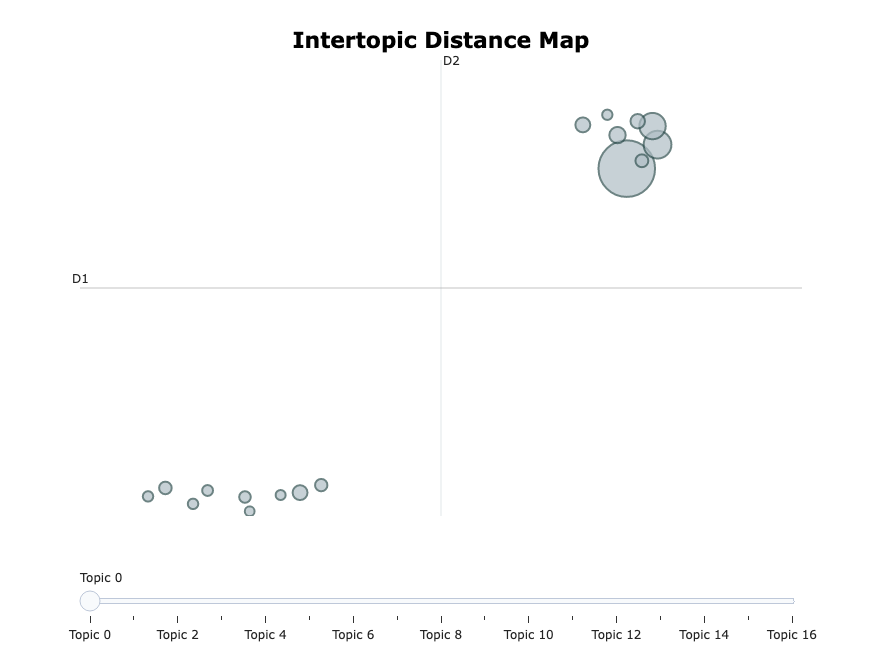

In [6]:
pio.read_json("./viz/topics_viz.json")

In [7]:
tweets = pd.read_csv("./data/tweet_with_topic.csv")
tweets.head()

id                                                url  \
0  1443726713742053376  https://twitter.com/teropong_news/status/14437...   
1  1443725749718958082  https://twitter.com/BPJSKesehatanRI/status/144...   
2  1443724723985137689  https://twitter.com/cupcakesqueen65/status/144...   
3  1443724121066520578  https://twitter.com/Jornmungandr/status/144372...   
4  1443723656417329162  https://twitter.com/win01cityx/status/14437236...   

                        date  \
0  2021-09-30 23:57:26+00:00   
1  2021-09-30 23:53:36+00:00   
2  2021-09-30 23:49:31+00:00   
3  2021-09-30 23:47:08+00:00   
4  2021-09-30 23:45:17+00:00   

                                                text          user  \
0  BPJS Ketenagakerjaan Merauke Serahkan Santunan...  7.009317e+17   
1  @krisnapuspa @krisnapuspa \nSalam Sehat Sahaba...  1.522338e+09   
2  @bertanyarl Aku ke puskesmas pake BPJS cuma ba...  1.267726e+18   
3                               @H0MIESIDE bpjs yak?  1.332580e+18   
4  Untuk pengguna bpjs, kalau mau ke faskes I nya...  1.128059e+09   

  coordinates place hashtags sentiment  \
0         NaN   NaN      NaN   neutral   
1         NaN   NaN      NaN   neutral   
2         NaN   NaN      NaN  negative   
3         NaN   NaN      NaN   neutral   
4         NaN   NaN      NaN   neutral   

                                      text_processed                  topic  
0  BPJS Ketenagakerjaan Merauke Serahkan Santunan...  outlier: bpjs, di, yg  
1  Salam Sehat Sahabat. Dengan senang hati, inter...        support_twitter  
2  Aku ke puskesmas pake BPJS cuma bayar ribu Jan...  outlier: bpjs, di, yg  
3                                          bpjs yak?  outlier: bpjs, di, yg  
4  Untuk pengguna bpjs, kalau mau ke faskes I nya...  outlier: bpjs, di, yg

In [8]:
tweets = tweets.sample(100)

In [ ]:
topics, probs = topic_model.fit_transform(tweets.text_processed.values)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
topics_over_time = topic_model.topics_over_time(tweets.text_processed.values, tweets.date.values)

In [ ]:
model.visualize_topics_over_time(topics_over_time)

In [1]:
import snscrape.modules.twitter as twtscraper

In [ ]:
tweets = []
for i, twt in enumerate(twtscraper.TwitterSearchScraper("bpjs lang:id").get_items()):
    if i > 20:
        break
    tweets.append([twt.url, twt.user.username, twt.content, tweet.date])

In [ ]:
tweets